In [1]:
import pandas as pd
import numpy as np

from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score
from sklearn import neighbors
from sklearn.neighbors import (KNeighborsClassifier,NeighborhoodComponentsAnalysis)

import matplotlib.pyplot as plt

In [2]:
#Reading the csv file of large dataset and its target values
df_numeric = pd.read_csv('data1.csv')
df_target=pd.read_csv('data_target1.csv')


# Dealing with imbalanced dataset

In [3]:
#Using SMOTE method to balance clases of dataset
y = df_target['TARGET'].astype('int')
X_balance,Y_balance = SMOTE().fit_sample(df_numeric,y)
X_balance = pd.DataFrame(X_balance, columns = df_numeric.columns)

# Splitting the data to train and test

In [4]:
#Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_balance, Y_balance, test_size=0.7, random_state=105
)
print("Sizes and class distributions for train/test data")
print("Shape train_data {}".format(X_train.shape))
print("Shape test_data {}".format(X_test.shape))
print(
    "Train data number of 0s {} and 1s {}".format(
        np.sum(y_train == 0), np.sum(y_train == 1)
    )
)
print(
    "Test data number of 0s {} and 1s {}".format(
        np.sum(y_test == 0), np.sum(y_test == 1)
    )
)

Sizes and class distributions for train/test data
Shape train_data (4581, 72)
Shape test_data (10691, 72)
Train data number of 0s 2205 and 1s 2376
Test data number of 0s 5431 and 1s 5260


In [5]:
n_neighbors = 2

In [6]:
#for weights in ['uniform', 'distance'] we create an instances of Neighbours Classifiers and fit the data.
kncd = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
kncd.fit(X_train, y_train)

kncu = neighbors.KNeighborsClassifier(n_neighbors, weights='uniform')
kncu.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [7]:
#Predict y value for kncd
y_pred_distance = kncd.predict(X_test)

#Predict y value for kncu
y_pred_uniform = kncu.predict(X_test)

In [8]:
#print classifier accuracy for y_pred_distance and y_pred_uniform
print("Accuracy with weights being distance:",metrics.accuracy_score(y_test, y_pred_distance))
print("Accuracy with weights being uniform:",metrics.accuracy_score(y_test, y_pred_uniform))

Accuracy with weights being distance: 0.7974932185950799
Accuracy with weights being uniform: 0.8086240763258816


In [9]:
#print the confusion matrix for y_pred_distance
conf_mat_distance=confusion_matrix(y_test,y_pred_distance)
print(conf_mat_distance)

[[3382 2049]
 [ 116 5144]]


In [10]:
#print the confusion matrix for y_pred_uniform
conf_mat_uniform=confusion_matrix(y_test,y_pred_uniform)
print(conf_mat_uniform)

[[3840 1591]
 [ 455 4805]]


In [11]:
#Get a report of some measurements for y_pred_distance
print(classification_report(y_test,y_pred_distance))

              precision    recall  f1-score   support

           0       0.97      0.62      0.76      5431
           1       0.72      0.98      0.83      5260

    accuracy                           0.80     10691
   macro avg       0.84      0.80      0.79     10691
weighted avg       0.84      0.80      0.79     10691



In [12]:
#Get a report of some measurements for y_pred_uniform
print(classification_report(y_test,y_pred_uniform))

              precision    recall  f1-score   support

           0       0.89      0.71      0.79      5431
           1       0.75      0.91      0.82      5260

    accuracy                           0.81     10691
   macro avg       0.82      0.81      0.81     10691
weighted avg       0.82      0.81      0.81     10691



In [13]:
#Get the f1 score for y_pred_distance
f1_score(y_test, y_pred_distance, average='macro')

0.7918389743037134

In [14]:
#Get the f1 score for y_pred_uniform
f1_score(y_test, y_pred_uniform, average='macro')

0.8070520561250607

In [15]:
#print misclassification error rate for y_pred_distance
print("Misclassification error rate for weights being distance :",round(np.mean(y_pred_distance!=y_test),3))

Misclassification error rate for weights being distance : 0.203


In [16]:
#print misclassification error rate for y_pred_uniform
print("Misclassification error rate for weights being uniform :",round(np.mean(y_pred_uniform!=y_test),3))

Misclassification error rate for weights being uniform : 0.191


In [17]:
#Calculate AUC for y_pred_distance
test_predictions = y_pred_distance
test_predictions_class = ((test_predictions > 0.5) * 1).flatten()
test_df = pd.DataFrame(
    {
        "Predicted_score": test_predictions.flatten(),
        "Predicted_class": test_predictions_class,
        "True": y_test,
    }
)
roc_auc = metrics.roc_auc_score(y_test, y_pred_distance)
print("The AUC on test set:\n")
print(roc_auc)

The AUC on test set:

0.8003340910825265


In [18]:
#Calculate AUC for y_pred_uniform
test_predictions = y_pred_uniform
test_predictions_class = ((test_predictions > 0.5) * 1).flatten()
test_df = pd.DataFrame(
    {
        "Predicted_score": test_predictions.flatten(),
        "Predicted_class": test_predictions_class,
        "True": y_test,
    }
)
roc_auc = metrics.roc_auc_score(y_test, y_pred_uniform)
print("The AUC on test set:\n")
print(roc_auc)

The AUC on test set:

0.8102751035633348


In [19]:
#Get the f1 score for y_pred_distance
f1_score(y_test, y_pred_distance, average='macro')

0.7918389743037134

In [20]:
#Get the f1 score for y_pred_uniform
f1_score(y_test, y_pred_uniform, average='macro')

0.8070520561250607

In [21]:
# Recall
from sklearn.metrics import recall_score
recall_score(y_test, y_pred_distance, average='macro')

0.8003340910825265

In [22]:
# Recall
from sklearn.metrics import recall_score
recall_score(y_test, y_pred_uniform, average='macro')

0.8102751035633349

In [23]:
#Precision
from sklearn.metrics import precision_score
precision_score(y_test, y_pred_distance, average='macro')

0.840988956212352

In [24]:
#Precision
from sklearn.metrics import precision_score
precision_score(y_test, y_pred_uniform, average='macro')

0.8226568227668486

# Choosing the best 'k' when it has lowest error rate

In [25]:
#Find error rate for all n_neighbors between 1 to 50
error_rate = []
for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean error rate')

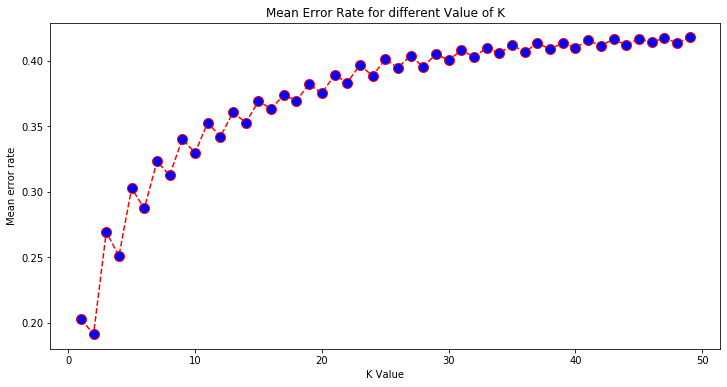

In [27]:
#Draw mean error rate with different value for n_neighbors 
plt.figure(figsize=(12, 6))
plt.plot(range(1, 50), error_rate, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Mean Error Rate for different Value of K')
plt.xlabel('K Value')
plt.ylabel('Mean error rate')